In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [2]:
IC = lambda x: -2 * x.mean() + 4 * x.var()

In [3]:
file = uproot.open('/home/apaul/beegfs/TheNewHope/PSR2/WEFT/FDD/C9_22/MCout.root')
tree = file['RealWeakEFTLFV_Observables']

In [4]:
df = pd.DataFrame()
df['C9'] = tree.get('C9_22').array(library="np")
df['LL'] = tree.get('LogLikelihood').array(library="np")
df['LP'] = tree.get('LogProbability').array(library="np")

df_m1 = df[df['C9']<0]
df_m2 = df[df['C9']>0]

In [15]:
df1 = df.sample(n=1000000)

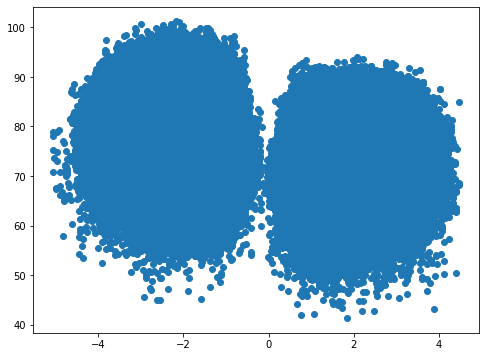

In [18]:
plt.figure(figsize=(8,6))
# plt.hist(df.C9, weights=df.LP.apply(lambda x: np.exp(x)), bins=50)
plt.scatter(df1.C9, df1.LP)
plt.show()

<AxesSubplot:>

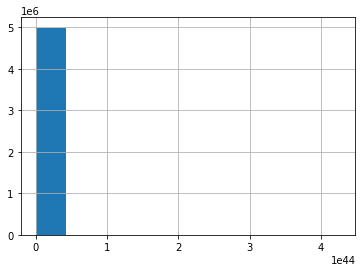

In [21]:
df.LP.apply(lambda x: np.exp(x)).hist()

In [5]:
print("IC (C9 < 0)", IC(df_m1['LL']))
print("IC (C9 > 0)", IC(df_m2['LL']))

IC (C9 < 0) 246.56869029159907
IC (C9 > 0) 253.90686521992475


In [6]:
file = uproot.open('/home/apaul/beegfs/bsll-2021/Final-Runs-1/SM/FDD/SM/MCout.root')
tree = file['StandardModel_Observables']

In [7]:
df = pd.DataFrame()
df['LL'] = tree.get('LogLikelihood').array(library="np")

In [8]:
print("IC (SM)", IC(df['LL']))

IC (SM) 262.2854154764583


In [10]:
import flavio

In [11]:
flavio.sm_prediction('BR(Bs->mumu)')

3.6677553688451343e-09

In [14]:
flavio.sm_uncertainty('BR(Bs->mumu)')

1.4731992142640069e-10

([<matplotlib.patches.Wedge at 0x2b026cd19160>,
 [Text(0.0472546165027228, 1.0989845318379967, '$V_{cb}$'),
  Text(-0.9282146149140024, -0.590269115455019, '$m_{t}$'),
  Text(0.081658410784357, -1.0969648599422743, '$f_{B_s}$'),
  Text(0.7186291636177528, -0.8328097773189562, '$\\delta$'),
  Text(0.9803460903300583, -0.49892037759002117, '$\\Delta \\Gamma_s/\\Gamma_s$'),
  Text(1.083666930014795, -0.1888544010403508, '$\\tau_{B_{s}}$'),
  Text(1.0996406559722436, -0.028114546642871562, 'other')],
 [Text(0.025775245365121525, 0.5994461082752708, '3.5\\%'),
  Text(-0.506298880862183, -0.321964972066374, '1.5\\%'),
  Text(0.04454095133692199, -0.5983444690594223, '0.99\\%'),
  Text(0.39197954379150146, -0.4542598785376124, '0.49\\%'),
  Text(0.5347342310891227, -0.27213838777637517, '0.41\\%'),
  Text(0.5910910527353427, -0.10301149147655497, '0.28\\%'),
  Text(0.5998039941666782, -0.015335207259748122, '0.059\\%')])

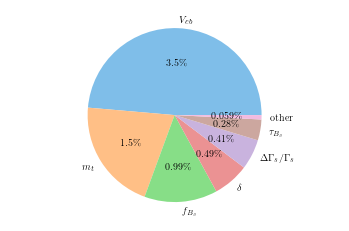

In [13]:
errors = flavio.sm_error_budget('BR(Bs->mumu)')
import flavio.plots
flavio.plots.error_budget_pie(errors)

Plotting C9 vs C10


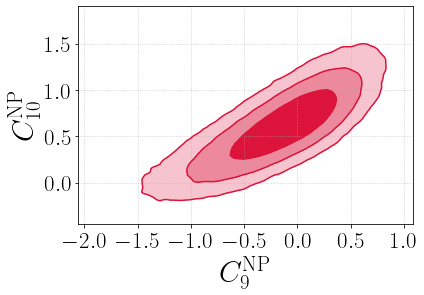

In [43]:
def computeHPDI2(my_samples):

    samples_dict = {}
    for i in range(len(my_samples[0,:])):
        samples_dict[i] = my_samples[:,i]

    stats_func_1 = {
        'b0': lambda x: multimode(x, 0, 0.6827),
        'b1': lambda x: multimode(x, 1, 0.6827),
        'b2': lambda x: multimode(x, 2, 0.6827),
        'b3': lambda x: multimode(x, 3, 0.6827)
        }

    stats_func_3 = {
        'b0': lambda x: multimode(x, 0, 0.9973),
        'b1': lambda x: multimode(x, 1, 0.9973),
        'b2': lambda x: multimode(x, 2, 0.9973),
        'b3': lambda x: multimode(x, 3, 0.9973)
        }

    hdi_1 = pd.DataFrame(az.summary(samples_dict, kind='stats', hdi_prob=0.6827, stat_funcs=stats_func_1, round_to=7))
    hdi_3 = pd.DataFrame(az.summary(samples_dict, kind='stats', hdi_prob=0.9973, stat_funcs=stats_func_3, round_to=7))

    print("68.27 ranges")
    for i in range(len(samples[0,:])):
        if np.isnan(hdi_1.loc[i]['b2']):
            print("[",hdi_1.loc[i]['b0'],",",hdi_1.loc[i]['b1'],"]")
        else:
            print("[",hdi_1.loc[i]['b0'],",",hdi_1.loc[i]['b1'],"] + [",hdi_1.loc[i]['b2'],",",hdi_1.loc[i]['b3'],"]")

    print("99.73 ranges")
    for i in range(len(samples[0,:])):
        if np.isnan(hdi_3.loc[i]['b2']):
            print("[",hdi_3.loc[i]['b0'],",",hdi_3.loc[i]['b1'],"]")
        else:
            print("[",hdi_3.loc[i]['b0'],",",hdi_3.loc[i]['b1'],"] + [",hdi_3.loc[i]['b2'],",",hdi_3.loc[i]['b3'],"]")


plot = "C9_C10"
if plot == "C9_C10":
    print("Plotting C9 vs C10")

    color_vec = ['crimson']
    approach_vec = ["PDD"]
    labels_vec = [r"LCSR @ $q^2 \leq 1$"]

    for i in range(len(approach_vec)):

        # print(data_directory+"SMEFT/"+approach_vec[i]+"/CLQ1_2223_CQe_2322")

        # file = uproot.open(code_directory+data_directory+"SMEFT/"+approach_vec[i]+"/CLQ1_2223_CQe_2322/MCout.root")
        file = uproot.open('/home/apaul/beegfs/bsll-2021/Normal-Runs/Clean-LHCBI-noBR/WEFT/PDD/C9_22_C10_22/MCout.root')
        # print(file.keys())
        tree = file['RealWeakEFTLFV_Observables']
        # print(tree.keys())
        # if Weight_bool == "y":
        #     keys = ['CLQ1_2223','CQe_2322','RK0_Kll_ch','R_Kst_ch']
        #     df = tree.arrays(library="pd")[keys]
        #     chain_0 = df.to_numpy()[:,0]
        #     chain_1 = df.to_numpy()[:,1]
        #     chain_RKS = df.to_numpy()[:,2]
        #     chain_RKstp = df.to_numpy()[:,3]
        # else:
        keys = ['C9_22','C10_22']
        df = tree.arrays(library="pd")[keys]
        chain_0 = df.to_numpy()[:,0]
        chain_1 = df.to_numpy()[:,1]
        ndim, nsamples = 2, len(chain_0)
        samples = np.ndarray((nsamples,ndim))
        samples[:,0] = chain_0[:nsamples]
        samples[:,1] = chain_1[:nsamples]
#         index_phys = np.where(samples[:,1]>-100)[0]

#         if Weight_bool == "y":
#             my_weights = np.zeros(len(index_phys))
#             my_temp_weights = np.exp(-0.5*(chain_RKS-RKS_ave)**2/RKS_std**2)
#             my_temp_weights *= np.exp(-0.5*(chain_RKstp-RKstp_ave)**2/RKstp_std**2)
#             my_weights[:] = my_temp_weights[:]/np.sum(my_temp_weights)
#         else:
        my_weights = [1]*nsamples

        # computeHPDI(samples)

        corner.hist2d(samples[:,0], samples[:,1], bins=100,
        levels=(1.-np.exp(-1.15),1.-np.exp(-3.09),1.-np.exp(-5.915)),
        # levels=(0.6827,0.9545,0.9973),
        plot_contours = True, fill_contours = True, smooth=True, plot_datapoints = False, color = color_vec[i])

    plt.xticks(fontsize = 23)
    plt.yticks(fontsize = 23)
    plt.grid(linestyle=':', alpha = 0.7)
    # temp = np.zeros(len(index_phys))
    # temp[:] = -100
    # plt.plot(index_phys[:],temp,color=color_vec[0],label=labels_vec[0])
    # plt.plot(index_phys[:],temp,color=color_vec[1],label=labels_vec[1])
    # plt.plot(index_phys[:],temp,color=color_vec[2],label=labels_vec[2])
    # plt.legend(loc='upper left',numpoints=1,fontsize = 15)
    plt.xlabel(r"$C^{\rm NP}_{9}$",fontsize = 30)
    plt.ylabel(r"$C^{\rm NP}_{10}$",fontsize = 30)
    # plt.savefig(code_directory+"plots_2021/C9_C10.pdf",bbox_inches='tight')
    plt.show()
    plt.close()

In [18]:
import corner

In [2]:
file = uproot.open('/home/apaul/beegfs/bsll-2021/Final-Runs/SMEFT/FDD/C_all_22/MCout.root')
tree = file['NPSMEFTd6_Observables']

In [46]:
tree.keys()

['Chain',
 'Iteration',
 'LogLikelihood',
 'LogProbability',
 'LogPriorProbability',
 'RK0_Kll_ch',
 'R_Kst_ch',
 'R_Kst_low_ch',
 'R_Kstp_ch',
 'R_Kstp_low_ch',
 'reh_0',
 'reh_p',
 'reh_m',
 'imh_0',
 'imh_p',
 'imh_m',
 'reh_0_1',
 'reh_p_1',
 'reh_m_1',
 'imh_0_1',
 'imh_p_1',
 'imh_m_1',
 'reh_p_2',
 'reh_m_2',
 'imh_p_2',
 'imh_m_2',
 'reh_0_MP',
 'reh_1_MP',
 'reh_2_MP',
 'imh_0_MP',
 'imh_1_MP',
 'imh_2_MP',
 'DC9_hlambda_1',
 'DC9_hlambda_2',
 'DC9_hlambda_3',
 'DC9_hlambda_4',
 'DC9_hlambda_5',
 'DC9_hlambda_6',
 'DC9_hlambda_7',
 'DC9_hlambda_8',
 'DC9_hlambda_8',
 'DC9_hlambda_10',
 'DC9_hlambda_11',
 'DC9_hlambda_12',
 'DC9_hlambda_13',
 'DC9_hlambda_14',
 'DC9_hlambda_15',
 'CQe_2322',
 'CLQ1_2223',
 'CLd_2223',
 'Ced_2223',
 'CLedQ_22',
 'CpLedQ_22',
 'P_5p_LQ1_LHCb',
 'P_5p_LQ2_LHCb',
 'P_5p_LQ3_LHCb',
 'P_5p_LQ4_LHCb',
 'P_5p_LQ5_LHCb',
 'P_5p_LQ1_p',
 'P_5p_LQ2_p',
 'P_5p_LQ3_p',
 'P_5p_LQ4_p',
 'P_5p_LQ5_p']

In [25]:
df = pd.DataFrame()
df['CLQ1_2223'] = tree.get('CLQ1_2223').array(library="np")
df['Ced_2223'] = tree.get('Ced_2223').array(library="np")
df['CLd_2223'] = tree.get('CLd_2223').array(library="np")
df['CQe_2322'] = tree.get('CQe_2322').array(library="np")
df['LL'] = tree.get('LogLikelihood').array(library="np")

In [30]:
IC(df[df['LL']>-120]['LL'])

235.65815126608402

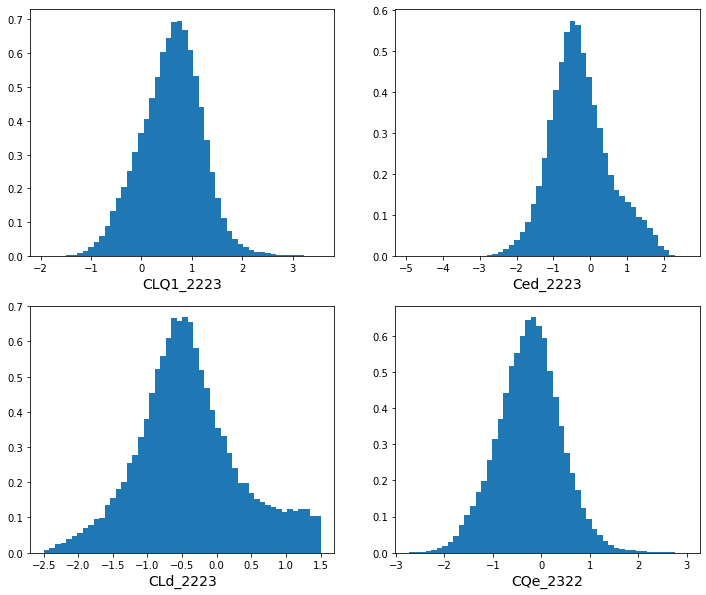

In [13]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.hist(df[df['LL']>-120]['CLQ1_2223'].sample(n=100000), bins=50, density=True)
plt.xlabel('CLQ1_2223', fontsize=14)

plt.subplot(2,2,2)
plt.hist(df[df['LL']>-120]['Ced_2223'].sample(n=100000), bins=50, density=True)
plt.xlabel('Ced_2223', fontsize=14)

plt.subplot(2,2,3)
plt.hist(df[df['LL']>-120]['CLd_2223'].sample(n=100000), bins=50, density=True)
plt.xlabel('CLd_2223', fontsize=14)

plt.subplot(2,2,4)
plt.hist(df[df['LL']>-120]['CQe_2322'].sample(n=100000), bins=50, density=True)
plt.xlabel('CQe_2322', fontsize=14)

plt.show()

In [18]:
df[df['LL']>-120].to_csv('cut_4P_SMEFT.dat.tar.gz',index=False)

In [23]:
df1 = pd.read_csv('cut_4P_SMEFT.dat.tar.gz')

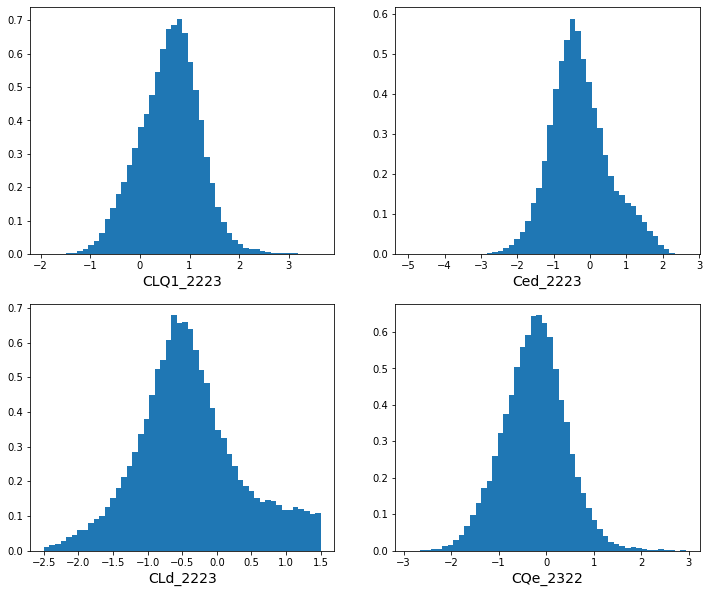

In [24]:
df = df1

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.hist(df[df['LL']>-120]['CLQ1_2223'].sample(n=100000), bins=50, density=True)
plt.xlabel('CLQ1_2223', fontsize=14)

plt.subplot(2,2,2)
plt.hist(df[df['LL']>-120]['Ced_2223'].sample(n=100000), bins=50, density=True)
plt.xlabel('Ced_2223', fontsize=14)

plt.subplot(2,2,3)
plt.hist(df[df['LL']>-120]['CLd_2223'].sample(n=100000), bins=50, density=True)
plt.xlabel('CLd_2223', fontsize=14)

plt.subplot(2,2,4)
plt.hist(df[df['LL']>-120]['CQe_2322'].sample(n=100000), bins=50, density=True)
plt.xlabel('CQe_2322', fontsize=14)

plt.show()

In [32]:
file = uproot.open('/home/apaul/beegfs/bsll-2021/Final-Runs-2/SMEFT/PMD/C_all_22/MCout.root')
tree = file['NPSMEFTd6_Observables']
df['LL'] = tree.get('LogLikelihood').array(library="np")
IC(df[df['LL']>-120]['LL'])

240.6801544627837